In [3]:
library(readr)
analysis.anova <- read.csv("D:/Alex/train_price_deal.csv", sep=",", header = TRUE)

In [4]:
## Find empty price data, count
sum(is.na(analysis.anova$price))
sum(is.na(analysis.anova$deal_probability))

[1] 85362

[1] 0

In [5]:
str(analysis.anova)
# after clean
cat("Total coumns", ncol(analysis.anova) ,"\n")
cat("Total rows ", nrow(analysis.anova),"\n")

'data.frame':	1503424 obs. of  4 variables:
 $ X               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ item_id         : Factor w/ 1503424 levels "0000081eebda",..: 1087112 267624 1095558 15143 731528 480070 1156611 630862 1161181 1041815 ...
 $ price           : num  400 3000 4000 2200 40000 1300 11000 500 500 400 ...
 $ deal_probability: num  0.128 0 0.432 0.803 0.208 ...
Total coumns 4 
Total rows  1503424 


In [6]:
# Clean Empty records
library(dplyr)
df2018 = read.csv("D:/Alex/train_price_deal.csv", na.strings = c("", "NA"))
df2018 = df2018 %>% na.omit()
head(df2018)
sum(is.na(df2018$price))




Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



X,item_id,price,deal_probability
0,b912c3c6a6ad,400,0.12789
1,2dac0150717d,3000,0.00000
2,ba83aefab5dc,4000,0.43177
3,02996f1dd2ea,2200,0.80323
4,7c90be56d2ab,40000,0.20797
5,51e0962387f7,1300,0.80323


[1] 0

In [7]:
# after clean
cat("Total coumns", ncol(df2018) ,"\n")
cat("Total rows ", nrow(df2018),"\n")

Total coumns 4 
Total rows  1418062 


<h1> correlation test </h1>
cor.test(x, y, method=c("pearson", "kendall", "spearman"))

In [8]:
# Correlation
cor.test(df2018$price, df2018$deal_probability, method=c("pearson"), use = "complete.obs", na.rm = TRUE)



	Pearson's product-moment correlation

data:  df2018$price and df2018$deal_probability
t = -1.3066, df = 1418100, p-value = 0.1913
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0027431253  0.0005486488
sample estimates:
         cor 
-0.001097241 


In [9]:
# Correlation
cor.test(df2018$price, df2018$deal_probability, method=c("spearman"), use = "complete.obs" , na.rm = TRUE)

Warning message in cor.test.default(df2018$price, df2018$deal_probability, method = c("spearman"), :
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  df2018$price and df2018$deal_probability
S = 3.7673e+17, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.207315 


In [10]:
shapiro.test(df2018$price)

ERROR: Error in shapiro.test(df2018$price): sample size must be between 3 and 5000


In [34]:
responsereg <- lm(df2018$deal_probability ~ df2018$price, df2018)
print(responsereg)
summary(responsereg)



Call:
lm(formula = df2018$deal_probability ~ df2018$price, data = df2018)

Coefficients:
 (Intercept)  df2018$price  
   1.346e-01    -4.233e-12  




Call:
lm(formula = df2018$deal_probability ~ df2018$price, data = df2018)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13455 -0.13455 -0.13455 -0.00154  0.86587 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.346e-01  2.167e-04 620.910   <2e-16 ***
df2018$price -4.233e-12  3.240e-12  -1.307    0.191    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2581 on 1418060 degrees of freedom
Multiple R-squared:  1.204e-06,	Adjusted R-squared:  4.988e-07 
F-statistic: 1.707 on 1 and 1418060 DF,  p-value: 0.1913


Loading required package: magrittr


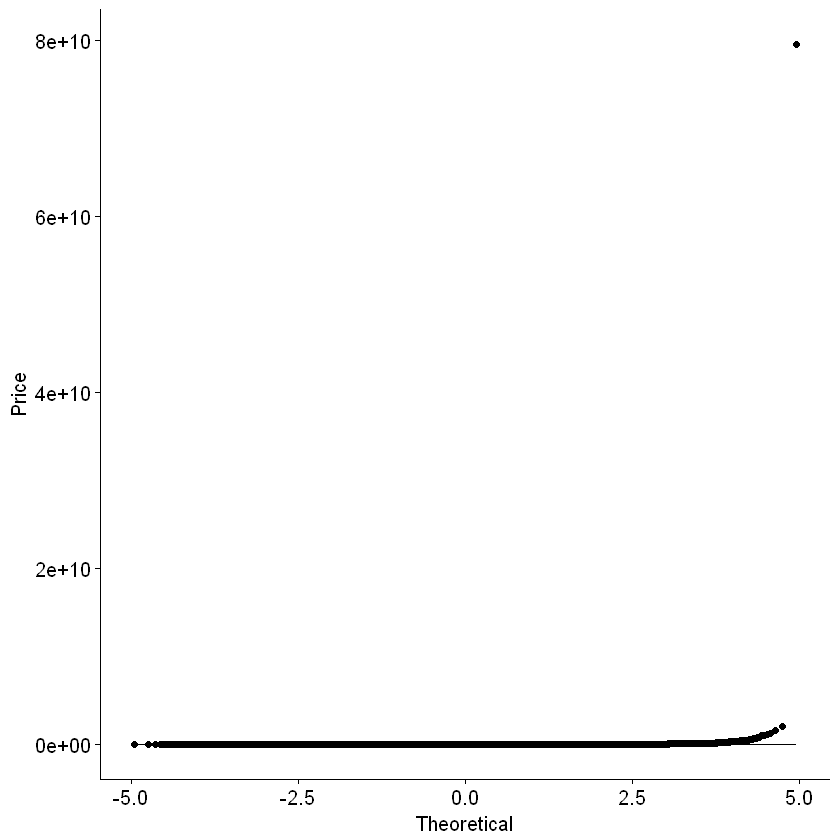

In [11]:
library(ggplot2)
library("ggpubr")
ggqqplot(df2018$price,, ylab = "Price")

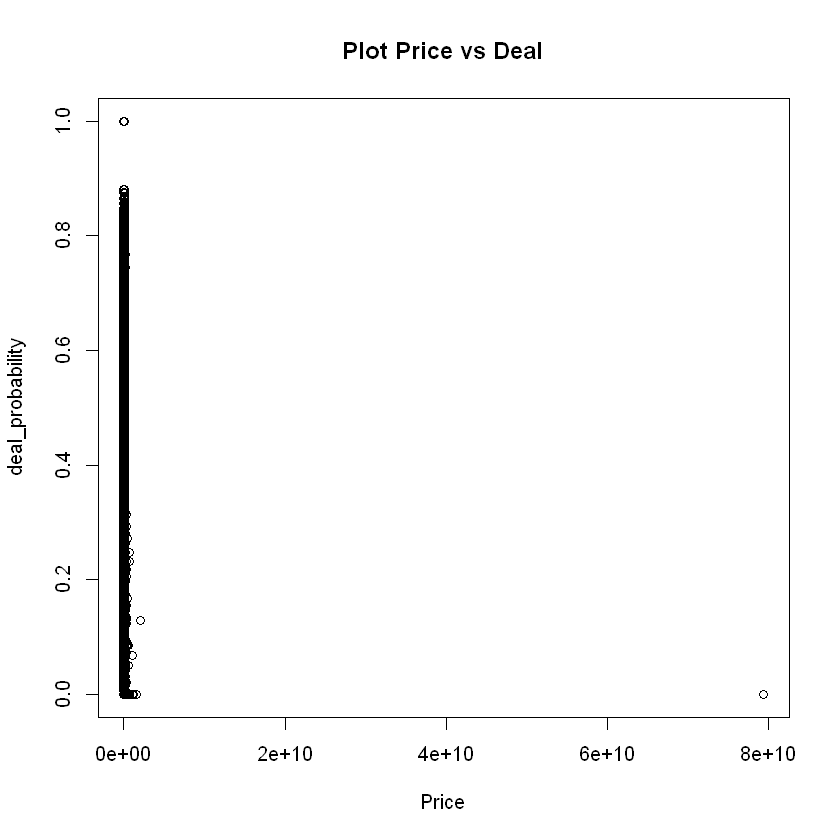

In [38]:
plot(df2018$deal_probability ~ df2018$price, data = df2018,
  xlab = "Price",
  ylab = "deal_probability",
  main = "Plot Price vs Deal"
)

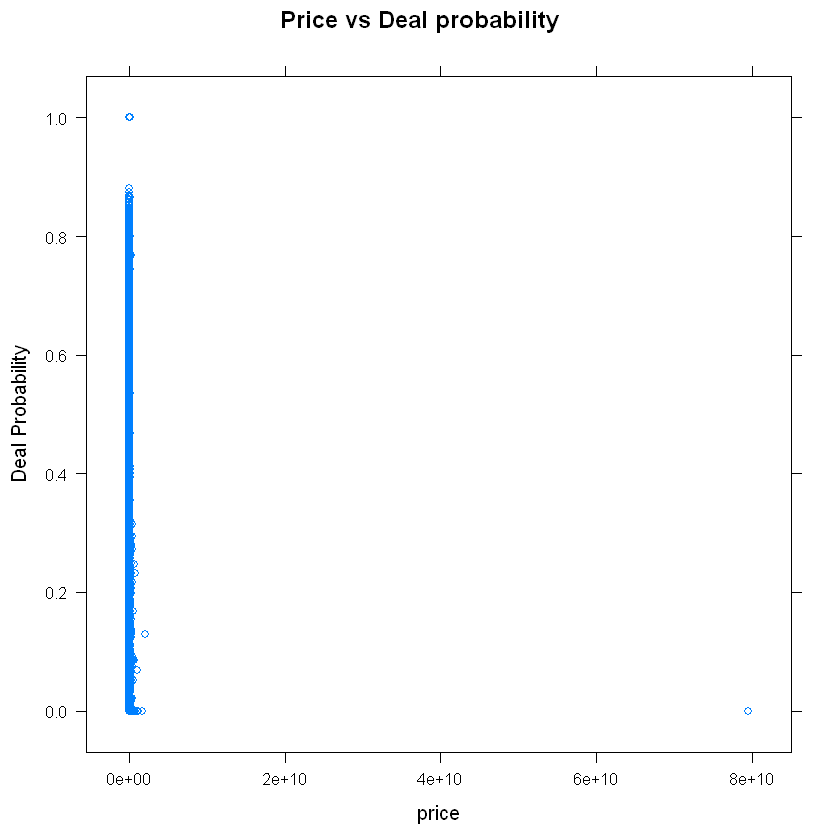

In [12]:
library(lattice)
xyplot(df2018$deal_probability ~ df2018$price, data = df2018,
  xlab = "price",
  ylab = "Deal Probability",
  main = "Price vs Deal probability"
)

<h1> This indicates Outliers causing problems <h1>

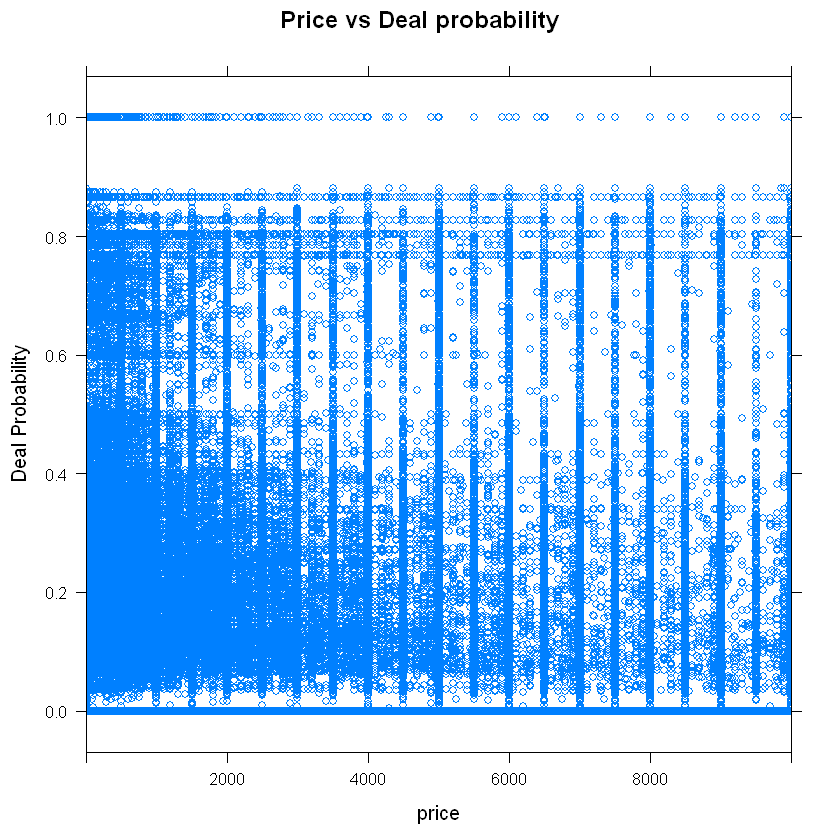

In [13]:
xyplot(df2018$deal_probability ~ df2018$price, data = df2018,
  xlab = "price",
  ylab = "Deal Probability",
  main = "Price vs Deal probability",
       xlim=c(0,10000)
)

In [14]:
summary(df2018$price)
# this indicates High price variation

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 5.000e+02 1.300e+03 3.167e+05 7.000e+03 7.950e+10 

In [17]:
# Filte
# retrieve rows based on a condition
df2018b = subset(df2018, df2018$price <= 200000)
summary(df2018b)
# after clean
cat("Total coumns", ncol(df2018b) ,"\n")
cat("Total rows ", nrow(df2018b),"\n")


       X                   item_id            price        deal_probability
 Min.   :      0   0000081eebda:      1   Min.   :     0   Min.   :0.0000  
 1st Qu.: 375982   00001e28bec4:      1   1st Qu.:   400   1st Qu.:0.0000  
 Median : 751570   00002b3a9c78:      1   Median :  1000   Median :0.0000  
 Mean   : 751634   000037e1c92f:      1   Mean   :  7098   Mean   :0.1351  
 3rd Qu.:1127403   000050150ea7:      1   3rd Qu.:  3500   3rd Qu.:0.1287  
 Max.   :1503423   0000554dcae2:      1   Max.   :200000   Max.   :1.0000  
                   (Other)     :1268394                                    

Total coumns 4 
Total rows  1268400 


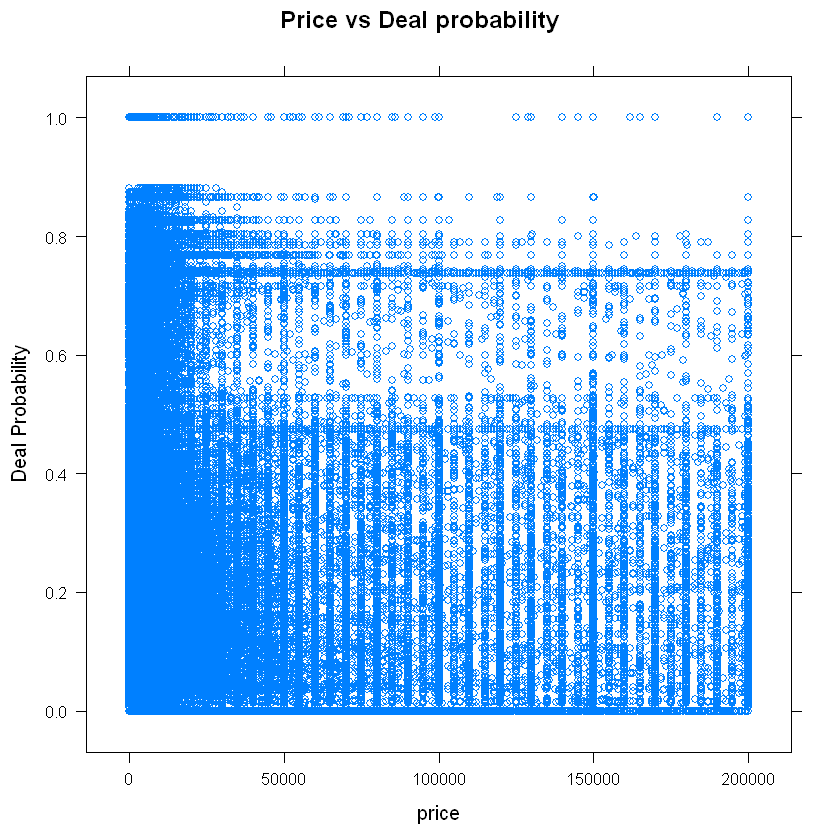

In [18]:
xyplot(df2018b$deal_probability ~ df2018b$price, data = df2018b,
  xlab = "price",
  ylab = "Deal Probability",
  main = "Price vs Deal probability"
)

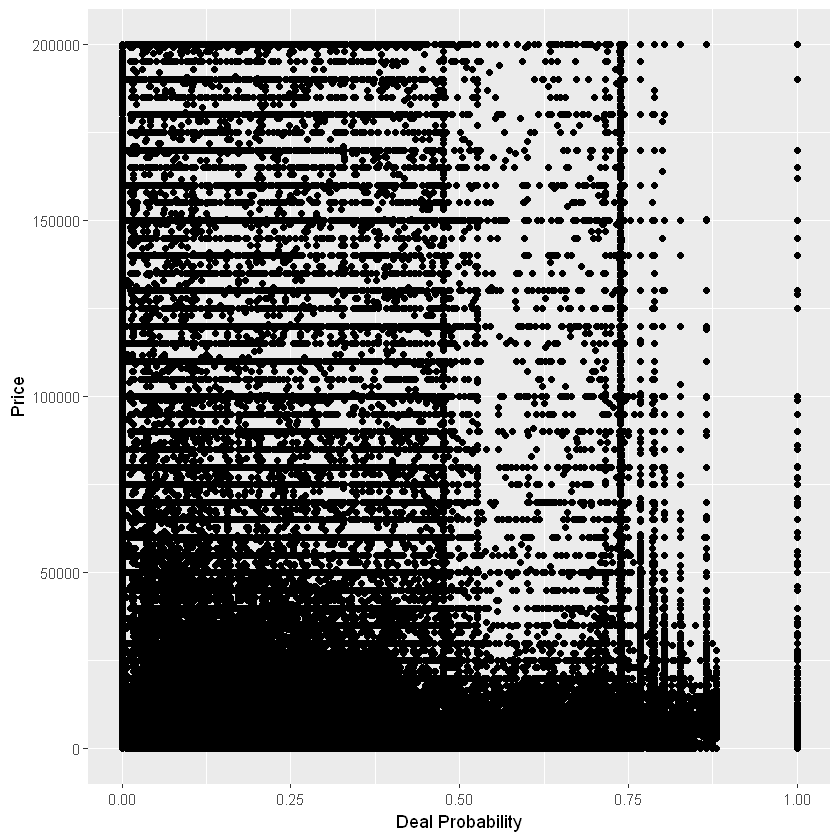

In [28]:
library(ggplot2)
ggplot(df2018b, aes(df2018b$deal_probability, df2018b$price)) + geom_point() +
  xlab("Deal Probability") + ylab("Price") 
  

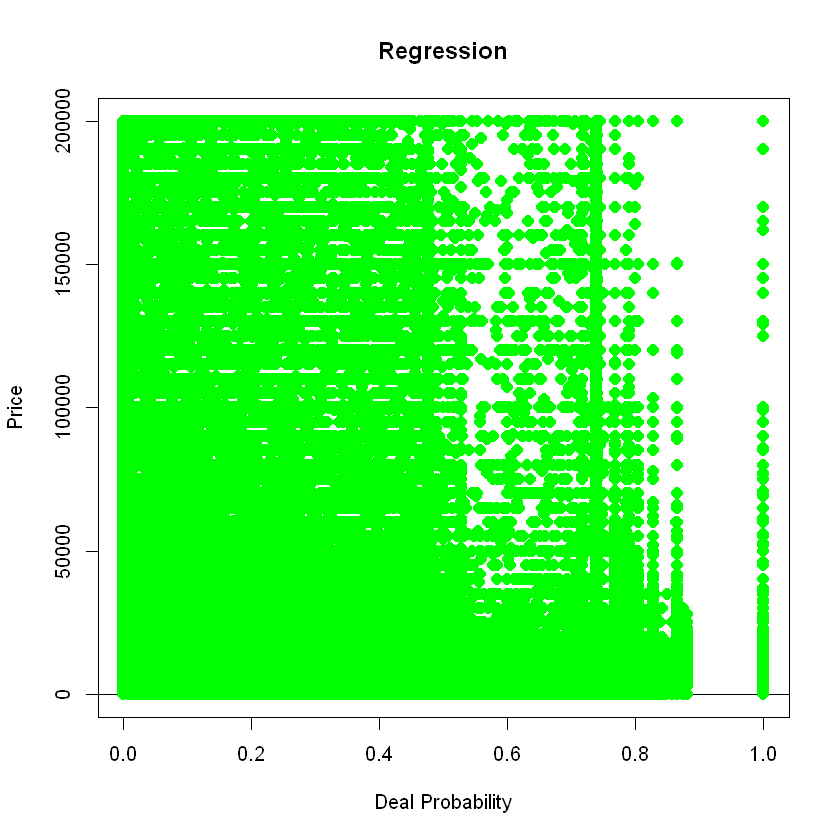

In [27]:
# Plot the chart.
plot(df2018b$deal_probability, df2018b$price,col = "green",main = "Regression",
abline(lm(df2018b$deal_probability ~ df2018b$price)),cex = 1.3,pch = 16, xlab = "Deal Probability",ylab = "Price")

<h1> better Regression </h1>

In [29]:
# after filter data
responsereg <- lm(df2018b$deal_probability ~ df2018b$price, df2018b)
print(responsereg)
summary(responsereg)


Call:
lm(formula = df2018b$deal_probability ~ df2018b$price, data = df2018b)

Coefficients:
  (Intercept)  df2018b$price  
    1.287e-01      9.008e-07  




Call:
lm(formula = df2018b$deal_probability ~ df2018b$price, data = df2018b)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30890 -0.13010 -0.12915 -0.00386  0.87126 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.287e-01  2.456e-04  524.31   <2e-16 ***
df2018b$price 9.008e-07  1.039e-08   86.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2638 on 1268398 degrees of freedom
Multiple R-squared:  0.005896,	Adjusted R-squared:  0.005895 
F-statistic:  7523 on 1 and 1268398 DF,  p-value: < 2.2e-16


In [31]:
# Correlation
cor.test(df2018b$price, df2018b$deal_probability, method=c("pearson"), use = "complete.obs", na.rm = TRUE)


	Pearson's product-moment correlation

data:  df2018b$price and df2018b$deal_probability
t = 86.734, df = 1268400, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07505489 0.07851493
sample estimates:
       cor 
0.07678514 


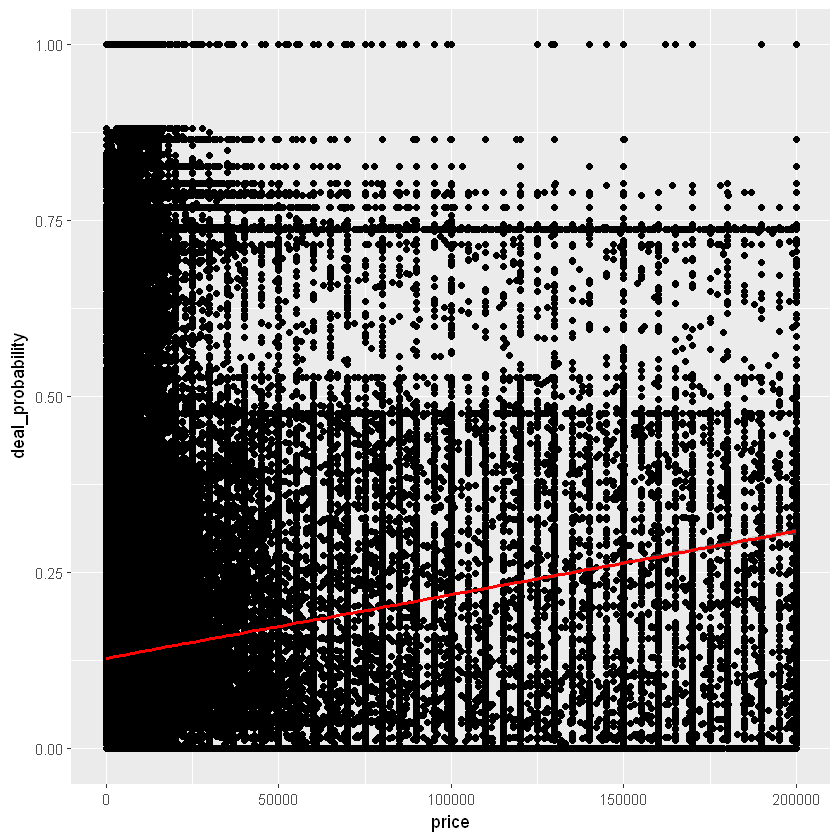

In [32]:
ggplot(df2018b, aes(x = price, y = deal_probability)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")

<h2> Conclusion: Data is highly heterogenous. Relation exists, but very weak. Predicting Deal probability from price is NOT correct
way. this might need on other information</h2>
